<a href="https://colab.research.google.com/github/SadatRafi11/NumericalMethodsUsingPython/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1> Math 4544 Numerical Analysis Lab</h1>
<h2> Lab 04 <h2>

The Objectives of this weeks lab is to implement and understand non-linear regression.Non-linear regression is often used to find the regression model because the data can be produced from a non-linear system. In this model, we wish to predict response to $n$ data points $(x_{1} ,y_{1}),(x_{2} ,y_{2}),......,(x_{n} ,y_{n}) $ by a regression models given by<br>
> $γ = Ae^{λt} .................................(1)$ <br>

where $A$ and $λ$ are the constants of the regression model.
A measure of goodness of fit, that is, how well $Ae^{λt}$ predicts the response variable
$γ $ is the magnitude of the residual $ε_{i}$ at each of the $n$ data points. <br>
> $E_{i} = γ_{i} -Ae^{λt_{i}} ...........................(2)$ <br>

For more on non-linear interpolation, please visit the class [lecture.](http://mathforcollege.com/nm/mws/gen/06reg/mws_gen_reg_txt_nonlinear.pdf) Go to  [matplotlib.pyplot tutorials](https://matplotlib.org/gallery/index.html#pyplot) for all kinds of help regarding plot.  


## Task 01 ##
To find the contraction of a steel cylinder, one needs to regress the thermal expansion coefficient data to temperature. The thermal expansion coefficient at given different temperatures are given below in the table. Fit the given data to the regression model
> $ α = a_{0} + a_{1}T + a_{2}T^{2} $

|Temperature <br> F|Coefficient <br> α |
|---|---|
|80|6.47e-6|
|40|6.24e-6|
|-40|5.72e-6|
|-120|5.09e-6|
|-200|4.30e-6|
|-280|3.33e-6|
|-340|2.45e-6|
|---|---|



In [ ]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

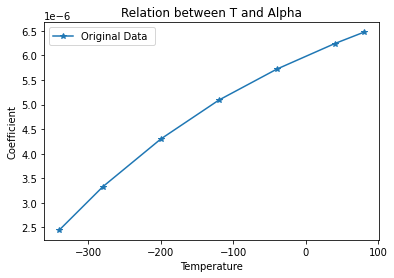

In [ ]:
#Dataset description for Task 01  


T = np.array([80, 40, -40, -120, -200, -280, -340])
alpha = np.array([6.47e-6, 6.24e-6, 5.72e-6, 5.09e-6, 4.30e-6, 3.33e-6, 2.45e-6])

plt.plot(T, alpha, label='Original Data ', marker='*')
plt.title('Relation between T and Alpha')
plt.xlabel('Temperature')
plt.ylabel('Coefficient')
plt.legend()
plt.show()

Using regression, calculate the values of a0, a1 and a2. For this, recall the necessary equation:

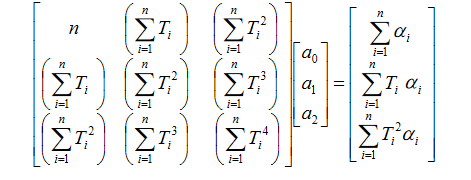

After regressing the values of a0, a1 and a2, plot the curve of the normal approximation and the equation of the regression function on top of each other like this:


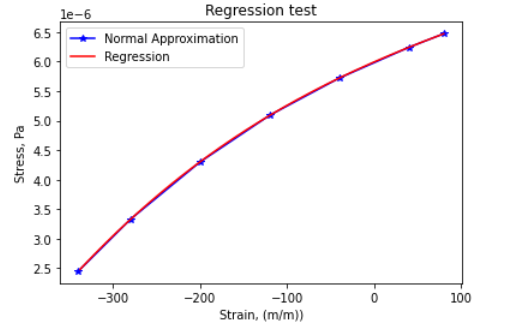

The coefficients of regression are: [ 6.02163436e-06  6.27898860e-09 -1.22151562e-11]


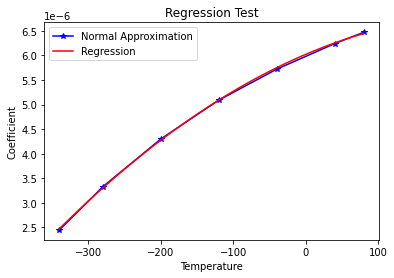

In [ ]:
def nonLinearRegression(x_list, y_list, degree):
  '''
  Using the below LinAl technique we can find out the solution of this regression
  A*x = y 
  =>x = (A**(-1))*y
  '''
  
  #Initializing the matrices with 0 values using list comprehension
  matrix_A = [ [0 for j in range(degree + 1)] for i in range(degree + 1)]
  matrix_y = [0 for i in range(degree + 1)]

  limit = len(x_list)
  #Calculatig first matrix
  for i in range(degree + 1):
    for j in range(degree + 1):
      sum = 0
      for k in range(limit):
        sum += x_list[k]**(i + j)
      matrix_A[i][j] = sum

  #Calculating the second matrix
  for i in range(degree + 1):
    sum = 0
    for j in range(limit):
      sum += (x_list[j]**i) * y_list[j] 
    matrix_y[i] = sum

  matrix_x = np.dot(np.linalg.inv(matrix_A), matrix_y)
  return matrix_x

coefficients =  nonLinearRegression(T, alpha, 2)
print("The coefficients of regression are:", coefficients)

#forming the eqn
a0 = coefficients[0]
a1 = coefficients[1]
a2 = coefficients[2]

x = sym.Symbol("x")
y = a0 + a1*x + a2*(x**2)
f = sym.lambdify(x, y)

#Predicting temp-coefficient using this regression
# print(T[0], T[len(T) - 1])
x_range = np.arange(T[0], T[len(T) - 1], -0.0001)
y_pred = np.arange(T[0], T[len(T) - 1], -0.0001)
# print(x_range)

for i in range(len(x_range)):
  y_pred[i] = f(x_range[i])

plt.plot(T, alpha, label='Normal Approximation', marker='*', color='b')
plt.plot(x_range, y_pred, label='Regression', color='r')
plt.title('Regression Test')
plt.xlabel('Temperature') #I guess it's not a stres-strain graph.
plt.ylabel('Coefficient') #Most probably it's a temperature-coefficient one.
plt.legend()
plt.show()

#Observation:
We can see that non-linear regression curve can fit a polynomial graph. In this case, it's a second order polynomial.

## Task 02 ##
To find the longtidinal modulous of a composite materials, the follwoing data, as given in the table is collected.

| Strain [m/m] |  Stress [Pa] |
| --- | --- | 
| 0 | 0 | 
| 0.183 | 306 | 
| 0.36 | 612 | 
| 0.5224 | 917 | 
| 0.702 | 1223 | 
| 0.867 | 1529 | 
| 1.0244 | 1835 | 
| 1.1774 | 2140 | 
| 1.329 | 2446 | 
| 1.479 | 2752 |
| 1.5 | 2767 | 
| 1.56 | 2896 | 

Find the longitudinal modulous $E$ using the regression model  $ σ = Eε$

Using regression, calculate a value of $E$. For this, recall the equation can be rewritten as:

$ln σ = ln E + ln ε$

Which is in the form of: dependant variable = constant + independant variable

Now, linear regression can be applied to solve this problem for calculating $E$

After calculation, plot the regressed function on top of the original points. You should get a plot like this: 
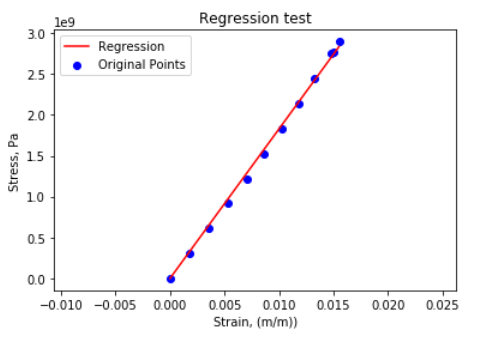



In [ ]:
# Dataset description for Task 02
strain = np.array([0.0000,      1.83e-3,    3.6e-3,  
                   5.324e-3,    7.020e-3,   8.67e-3,
                   1.0244e-2,   1.1774e-2,  1.329e-2,
                   1.479e-2,    1.5e-2,     1.56e-2])

stress = np.array([ 0.000,    3.06e8,     6.12e8, 
                    9.17e8,   1.22e9,     1.529e9, 
                    1.835e9,  2.14e9,     2.446e9,
                    2.752e9,  2.767e9,    2.896e9 ])

The value of E is:  182820907110.36127


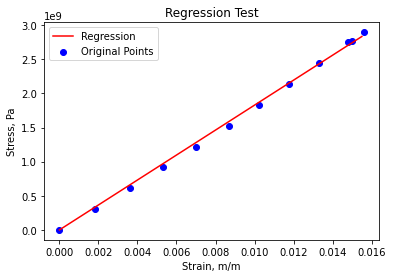

In [ ]:
'''
(stress = E * strain) can be depicted as (y = mx) which is a linear eqn.
so we can find E by regressing it linearly
i.e. E = summation(stress * strain)/summation(strain**2)
'''
sum_x_squared = np.multiply(strain, strain)
sum_xy = np.multiply(strain, stress)
E = np.sum(sum_xy)/np.sum(sum_x_squared)
print('The value of E is: ' , E)

x = sym.Symbol("x")
y = E*x
f = sym.lambdify(x, y)

#Predicting Stress using this regression
x_range = np.arange(strain[0], strain[len(strain) - 1], 0.0001)
y_pred = np.arange(strain[0], strain[len(strain) - 1], 0.0001)
# print(x_range)

for i in range(len(x_range)):
  y_pred[i] = f(x_range[i])

plt.scatter(strain, stress, label='Original Points', marker='o', color='b')
plt.plot(x_range, y_pred, label='Regression', color='r')
plt.title('Regression Test')
plt.xlabel('Strain, m/m')
plt.ylabel('Stress, Pa')
plt.legend()
plt.show()

#Observation
We can see that it's a basic y=mx linear graph starting form (x, y)=(0, 0) and goes beyond as a straight line.

## Task 03 ## 
Many patients get concerned when a test involves injection of a radioactive material.  For example for scanning a gallbladder, a few drops of $Technetium-99m$ isotope is used.  Half of the $Technetium-99m$ would be gone in about 6 hours.  It, however, takes about 24 hours for the radiation levels to reach what we are exposed to in day-to-day activities.  Below is given the relative intensity of radiation as a function of time.The following table gives Relative intensity of radiation as a function of time

|t (hrs)|0|1|3|5|7|9|
|---|---|---| ---|---|---|---|
|1.000|0.891|0.708|0.562|0.447|0.355|

If the level of the relative intensity of radiation is related to time via an exponential formula $γ = Ae^{λt}$, then find the following. 

1. the value of the regression constants  and ,
2. the half-life of Technium-99m, and
3. the radiation intensity after 24 hours.




## Solution Aproach: ## 
$$\gamma = Ae^{\lambda t}..........................(1)$$
$$ln(\gamma) = ln(A) + \lambda t$$
Assuming that
$$y = ln(\gamma)$$
$$a_{0} = ln(A)$$
$$ a_{1} = \lambda$$
Thus we get
$$y = a_{0} + a_{1}t$$
This is a linear relation between $y$ andn $t$
Here the solution of the linear regression model will be as follows
$$a_{1} = \frac{n\sum_{i=1}^{n}t_{i}y_{i} -\sum_{i=1}^{n}t_{i}\sum_{i=1}^{n}y_{i}   }              {n\sum_{i=1}^{n}t_{i}^{2} - (\sum_{i=1}^{n}t_{i})^{2}}$$ <br>
$$a_{0} = \bar{y} -a_{1}\bar{t}$$<br>

Now to get back to the equation(1) we calculate the following. 
$$A = e^{a_{0}}    $$and$$ \lambda = a_{1}$$

Write the necesssary code for this solution and plot the regressed function on top of the original data points. 


In [ ]:

t     = np.array([0,  1,      3,      5,      7,      9])
gamma = np.array([1,  0.895,  0.708,  0.562,  0.447,  0.355])


In [ ]:
'''
Linear regression is the same as having degree=1 non-linear 
regression. So we can just use the function from Task-1 to 
regress and get the values of A and λ. The values should be 
very close to the values we will get from the back-substitution
described above.
'''
ln_gamma = np.log(gamma)
constants = nonLinearRegression(t, ln_gamma, 1)
# answer to the question to #1
print("The value of the regressed constants are:", np.exp(constants[0]), constants[1])

# answer to the question to #2 (half_life)
print("Half-life would be:", np.log(0.5)/constants[1])

# answer to the question to #2 (radiation_intensity)
given_t = 24
print("Radiation intensity after 24 hrs would be:", np.exp(given_t*constants[1]) * (np.exp(constants[0])) * 100, "%")



The value of the regressed constants are: 1.001457647297054 -0.11528279458889182
Half-life would be: 6.0125813486025095
Radiation intensity after 24 hrs would be: 6.295529018264721 %


In [ ]:
'''
another way could be back substitution
'''
n = len(t)
y_mean = np.average(ln_gamma)
x_mean = np.average(t)
sum_xy = np.sum(np.multiply(t, ln_gamma))
sum_x__sum_y = np.sum(t) * np.sum(ln_gamma)
sum_x_squared = np.sum(np.multiply(t, t))
sq_sum_x = np.sum(t) * np.sum(t)

constant_a1 = (n*sum_xy - sum_x__sum_y)/(n*sum_x_squared - sq_sum_x)
constant_a0 = np.exp(y_mean - constant_a1*x_mean)
# answer to the question to #1
print("The value of the regressed constants are: ", constant_a0, constant_a1)

# answer to the question to #2 (half_life)
print("Half-life would be:", np.log(0.5)/constant_a1)

# answer to the question to #2 (radiation_intensity)
given_t = 24
print("Radiation intensity after 24 hrs would be:", np.exp(given_t*constant_a1) * constant_a0 * 100, "%")



The value of the regressed constants are:  1.0014576472970538 -0.11528279458889185
Half-life would be: 6.012581348602509
Radiation intensity after 24 hrs would be: 6.295529018264717 %


#Observation:
We can see that both the approach produce the same results.
